<a href="https://colab.research.google.com/github/Iemaduddin/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Praktikum**

**1. Buat Gamma Correction sesuai dengan petunjuk berikut**

  Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


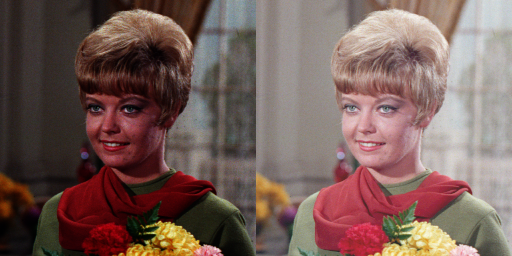

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
# -----------------------------------------------------
print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

**2. Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.

Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

Masukan Nilai Bit Depth : 1


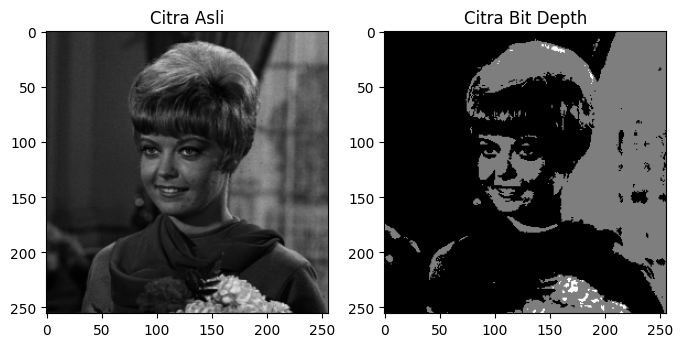

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

original = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

bit_depth=2

level = 255/(2**bit_depth)-1

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

# Menampilkan gambar
plt.figure(figsize=(8, 6))

# Gambar asli
plt.subplot(121)
plt.imshow(original, cmap='gray', vmin=0, vmax=255)
plt.title('Citra Asli')
plt.axis('on')

# depth_image
plt.subplot(122)
plt.imshow(depth_image, cmap='gray', vmin=0, vmax=255)
plt.title(f'Citra Bit Depth')
plt.axis('on')

plt.show()